# Data Cleaning & Preprocessing

🛠 Steps to Include:

- Remove or handle *missing/blank* texts

- Normalize:

    - Lowercasing

    - Remove HTML, URLs, emails, digits

- Remove or handle punctuation

- Remove or keep stopwords (experiment)

- Stemming or lemmatization

- Tokenization (if needed manually)

- Replace contractions ("don't" → "do not")

- Remove rare characters, special symbols

- Check encoding issues (non-ASCII etc.)

- Optional:

    - Spelling correction

    - Normalize emojis or emoticons

## Time for some Cleaning!

Before we move ahead , let us clean the dataset and remove the redundancies.This includes

- Lowercasing
- Punctuations
- Stopwords
- HTML codes
- URLs
- Emojis
- Expanding Abbreviations
- Apply Stemming or Lemmatization

These will be sufficient for cleaning the corpus! 

[Regex](https://docs.python.org/3/howto/regex.html) is a very good tool which will help us to do this cleaning.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import nltk
import re
import os
from tqdm import tqdm

os.getcwd()

'/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/bbc-news-sorting/notebooks'

In [2]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [3]:
# Download required NLTK datasets
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulshelke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rahulshelke/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rahulshelke/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rahulshelke/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/rahulshelke/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [4]:
# importing the zipfile module 
from zipfile import ZipFile 
import os
# loading the temp.zip and creating a zip object 
with ZipFile(os.path.join(os.getcwd() ,"data/learn-ai-bbc.zip"), 'r') as zObject: 
	# Extracting all the members of the zip 
	# into a specific location. 
	zObject.extractall(path=os.path.join(os.getcwd(), "data")) 


## Load the Dataset

In [5]:
DATA_PATH = os.path.join(os.getcwd(), "data")
# print(DATA_PATH)

In [6]:
test_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Test.csv"))
test_df.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [7]:
train_df = pd.read_csv(os.path.join(DATA_PATH, "BBC News Train.csv"))
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [8]:
train_df.shape

(1490, 3)

In [9]:
test_df.shape

(735, 2)

In [10]:
train_df["Category"].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

## Noise Present

In [11]:
# train data
train_unqiue = set()
for i in tqdm(train_df["Text"][0]):
    train_unqiue.update(set(i))

100%|██████████| 1866/1866 [00:00<00:00, 3716320.64it/s]


In [12]:
print(train_unqiue)

{'x', '$', '1', 'l', 'q', 'f', 'r', 'u', 'k', '8', '-', 'j', '4', 'z', 'b', ')', 't', 'c', 'o', 'g', '£', 'n', 'w', 'y', '0', 'm', ' ', '2', 'h', 'i', '7', '6', 'p', '.', '(', '5', 'a', 's', 'v', 'e', 'd'}


In [13]:
# Define a dictionary of common contractions and their expanded forms
contractions_dict = {
    "isn't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "i'd": "I would",
    "i'll": "I will",
    "i'm": "I am",
    "i've": "I have",
    "i'd've": "I would have",
    "i'm": "I am",
    "let's": "let us",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "weren't": "were not",
    "what's": "what is",
    "who's": "who is",
    "who've": "who have",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

# Function to expand contractions in a text
def expand_contractions(text):
    # Use regular expression to find contractions and replace them
    pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')
    expanded_text = pattern.sub(lambda x: contractions_dict[x.group()], text)
    return expanded_text

In [14]:
train_df["Clean_text"] = train_df["Text"].map(lambda x : expand_contractions(x))

In [15]:
test_df["Clean_text"] = test_df["Text"].map(lambda x : expand_contractions(x))

## Check with Each Category of Data

### 1. business

In [16]:
b_data = train_df[train_df["Category"] == "business"].copy()

b_data.shape

(336, 4)

In [17]:
b_data

,ArticleId,Text,Category,Clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...
8,2034,car giant hit by mercedes slump a slump in pro...,business,car giant hit by mercedes slump a slump in pro...
...,...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business,indy buys into india paper irish publishing gr...
1479,2058,high fuel costs hit us airlines two of the lar...,business,high fuel costs hit us airlines two of the lar...
1480,1124,qantas sees profits fly to record australian a...,business,qantas sees profits fly to record australian a...
1484,1774,hyundai to build new india plant south korea s...,business,hyundai to build new india plant south korea s...


In [18]:
print("First 10 samples of businees relates news samples\n".format(), b_data[:10])

First 10 samples of businees relates news samples
     ArticleId                                               Text  Category  \
0        1833  worldcom ex-boss launches defence lawyers defe...  business   
1         154  german business confidence slides german busin...  business   
2        1101  bbc poll indicates economic gloom citizens in ...  business   
4         917  enron bosses in $168m payout eighteen former e...  business   
8        2034  car giant hit by mercedes slump a slump in pro...  business   
12       1028  uk coal plunges into deeper loss shares in uk ...  business   
13        812  bp surges ahead on high oil price oil giant bp...  business   
25       1561  china had role in yukos split-up china lent ru...  business   
29       1503  iran budget seeks state sell-offs iran s presi...  business   
32       2002  china continues rapid growth china s economy h...  business   

                                           Clean_text  
0   worldcom ex-boss launches defe

**Data Containes:**

- Currancies
- Years
- Numbers
- Percentage

In [19]:
def remove_curruncies(text):
    """
    removes different curruancies from text
    e.g., $1,000, ₹500, €10.99

    Args: text (str)

    Returns: text (str)
    """
    try:
        # Currency regex pattern (includes symbols and codes)
        currency_pattern = r'[\₹\$\€\¥\£\₣\₽]?\d{1,3}(?:,\d{3})*(?:\.\d+)?(?:[mbn]{1,2})?|\b(?:USD|EUR|INR|GBP|JPY|CAD|AUD|CNY)\b|[\₹\$\€\¥\£\₣\₽]'


        currency_free_text = re.sub(currency_pattern, '', text)

        return currency_free_text
    except Exception as e:
        raise e

In [20]:
def remove_percentage(text):
    """ 
    removes percentages
    ex.,  25%, 5.5%, 1,000%
    """
    try:
        # Regex pattern to remove percentages
        percentage_pattern = r'\d{1,3}(?:,\d{3})*(?:\.\d+)?%'

        # Remove all percentage values
        cleaned_text = re.sub(percentage_pattern, '', text)

        return cleaned_text
    except Exception as e:
        raise e

In [21]:
def remove_numbers(text):
    """ 
    removes numbers from text
    ex., 
    - Integers (e.g., 100, 20)
    - Decimals (e.g., 5.5, 1000.99)
    - Numbers with commas (e.g., 1,000, 1,000,000)
    """
    try:
        # Regex pattern to remove numbers
        number_pattern = r'\b\d+(?:,\d{3})*(?:\.\d+)?\b'

        # Remove all numbers
        cleaned_text = re.sub(number_pattern, '', text)

        return cleaned_text
    except Exception as e:
        raise e

In [22]:
def remove_punctuation(text):
    """
    Removes all punctuation from the text.
    
    Args:
    text (str): Input string containing text with punctuation.
    
    Returns:
    str: Text with punctuation removed.
    """
    try:
        # Regex pattern to match any punctuation character
        punctuation_pattern = r'[' + re.escape(string.punctuation) + r']'
        
        # Replace all punctuation marks with an empty string
        cleaned_text = re.sub(punctuation_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [23]:
def remove_special_characters(text):
    """
    Removes special characters (non-alphanumeric characters) from the text.
    
    Args:
    text (str): Input string containing special characters.
    
    Returns:
    str: Text with special characters removed.
    """
    try:
        # Regex pattern to match any character that is not a letter or a digit
        special_characters_pattern = r'[^a-zA-Z0-9\s]'  # Allow only letters, digits, and spaces
        
        # Replace all special characters with an empty string
        cleaned_text = re.sub(special_characters_pattern, ' ', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [24]:
def remove_multiple_spaces(text):
    """
    removes multiple spaces
    """
    try:
        cleaned_text = re.sub(r'\s+', ' ', text)
        return cleaned_text
    except Exception as e:
        raise e

In [25]:

# Get the list of English stop words from nltk
stop_words = set(stopwords.words('english'))
    
# Define a function to process each text entry
def remove_stopwords(text):
    # Convert text to lowercase and split into words
    words = text.lower().split()
    
    # Remove stop words and punctuation
    words = [word.strip(string.punctuation) for word in words if word not in stop_words]
    
    # Return the cleaned text
    return ' '.join(words)

In [26]:
# Function to map POS tag to WordNet POS tag
def get_wordnet_pos(tag):
    if tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to NOUN

In [27]:
#Lemmatize the dataset`
def lemma_corpus(data):
    lemmatizer=WordNetLemmatizer()

    # Tokenize and get POS tags
    tokens = word_tokenize(data)
    pos_tags = nltk.pos_tag(tokens)

    # Lemmatize with correct POS tags
    lemmatized_words = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags
    ]

    return " ".join(lemmatized_words)

In [28]:
b_data.head()

,ArticleId,Text,Category,Clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...
8,2034,car giant hit by mercedes slump a slump in pro...,business,car giant hit by mercedes slump a slump in pro...


In [29]:
# normalizing
b_data["Clean"] = b_data["Text"].map(lambda x : x.lower())

# remove curruncies
b_data["Clean"] = b_data["Clean"].map(lambda x : remove_curruncies(x))

# remove percentage
b_data["Clean"] = b_data["Clean"].map(lambda x : remove_percentage(x))

# remove numbers
b_data["Clean"] = b_data["Clean"].map(lambda x : remove_numbers(x))

# remove special characters
b_data["Clean"] = b_data["Clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
b_data["Clean"] = b_data["Clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
b_data["Clean"] = b_data["Clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
b_data["Clean"] = b_data["Clean"].map(lambda x : remove_stopwords(x))

# lemmetization
b_data["Clean"] = b_data["Clean"].map(lambda x : lemma_corpus(x))

In [30]:
b_data

,ArticleId,Text,Category,Clean_text,Clean
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...,worldcom ex bos launch defence lawyer defend f...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...,bbc poll indicate economic gloom citizen major...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...,enron boss payout eighteen former enron direct...
8,2034,car giant hit by mercedes slump a slump in pro...,business,car giant hit by mercedes slump a slump in pro...,car giant hit mercedes slump slump profitabili...
...,...,...,...,...,...
1474,1257,indy buys into india paper irish publishing gr...,business,indy buys into india paper irish publishing gr...,indy buy india paper irish publishing group in...
1479,2058,high fuel costs hit us airlines two of the lar...,business,high fuel costs hit us airlines two of the lar...,high fuel cost hit u airline two largest airli...
1480,1124,qantas sees profits fly to record australian a...,business,qantas sees profits fly to record australian a...,qantas see profit fly record australian airlin...
1484,1774,hyundai to build new india plant south korea s...,business,hyundai to build new india plant south korea s...,hyundai build new india plant south korea hyun...


In [31]:
import random

for i in range(10):
    num = random.randint(0, b_data.shape[0])
    length = len(b_data.iloc[num][1])
    print(f"Text {num}: {b_data.iloc[num][1]}")
    print()
    print(f"Clean: {b_data.iloc[num][3]}")
    print('='*length)

Text 60: europe asks asia for euro help european leaders say asian states must let their currencies rise against the us dollar to ease pressure on the euro.  the european single currency has shot up to successive all-time highs against the dollar over the past few months. tacit approval from the white house for the weaker greenback  which could help counteract huge deficits  has helped trigger the move. but now europe says the euro has had enough  and asia must now share some of the burden.  china is seen as the main culprit  with exports soaring up 35% in 2004 partly on the back of a currency pegged to the dollar.  asia should engage in greater currency flexibility   said french finance minister herve gaymard  after a meeting with his german counterpart hans eichel. markets responded by pushing the euro lower  in the expectation that the rhetoric - and the pressure - is unlikely to ease ahead of a meeting of the g7 industrialised countries next week. early on tuesday morning  the doll

In [32]:
#WordCloud Visualizations
#Method for creating wordclouds

def display_cloud(data):
    """
    Generates and displays a word cloud based on input text data with a specified image mask and contour color.

    This function uses the WordCloud library to generate a visual representation of word frequencies in the 
    input text data. The word cloud is displayed using matplotlib, and it can be customized with an image 
    mask (if provided), background color, contour width, and contour color.

    Parameters:
    -----------
    data : pd.Series
        The input text data to be used for generating the word cloud. It can be a list of words or a single 
        string of text. The words in the input will be tokenized and used to determine the size of each word 
        in the cloud based on frequency.
    
    img_path : str
        The file path to an image that can be used as a mask for the word cloud shape. This image will dictate 
        the form of the word cloud. If not needed, this parameter can be left commented out or set to None 
        (currently not used in this version).

    color : str
        The color to be used for the contour of the word cloud. The contour color will be applied around 
        the edges of the cloud. Typical values could be any valid Matplotlib color (e.g., 'blue', 'red', 
        'green', etc.).

    Returns:
    --------
    None
        The function does not return anything. It generates a word cloud and displays it using matplotlib.
    """
    plt.subplots(figsize=(10,10))
    # mask = np.array(Image.open(img_path))
    wc = WordCloud(stopwords=stopwords.words(), 
                   background_color="black", 
                   max_words=100, max_font_size=256,
                   random_state=42
                   )
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

Word Cloud of Business Category


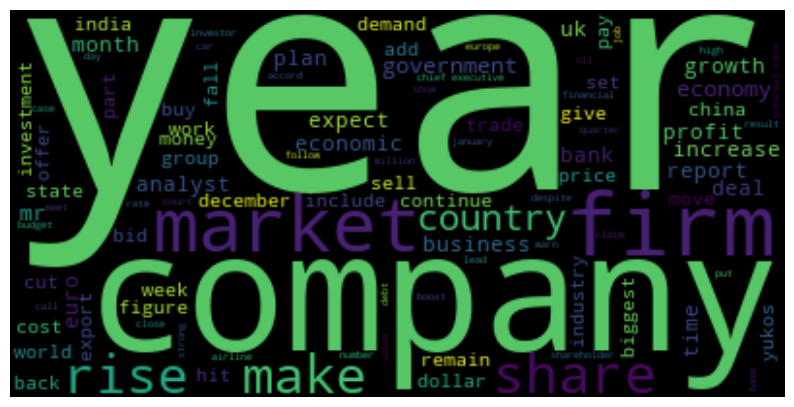

In [33]:
print("Word Cloud of Business Category")
display_cloud(b_data['Clean'])

In [34]:
# validation : looking for unique characters in the cleaned text
b_unqiue = set()
for i in tqdm(b_data["Clean"]):
    b_unqiue.update(set(i))

print(b_unqiue)

100%|██████████| 336/336 [00:00<00:00, 47714.18it/s]

{'x', 'l', 'q', 'f', 'r', 'u', 'k', 'j', 'z', 'b', 't', 'o', 'c', 'g', 'w', 'y', 'm', ' ', 'h', 'i', 'e', 'p', 'a', 's', 'v', 'n', 'd'}


### 2. entertainment

In [35]:
e_data = train_df[train_df["Category"] == "entertainment"].copy()

e_data.shape

(273, 4)

In [36]:
e_data

,ArticleId,Text,Category,Clean_text
7,1797,french honour for director parker british film...,entertainment,french honour for director parker british film...
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,fockers fuel festive film chart comedy meet th...
11,1153,housewives lift channel 4 ratings the debut of...,entertainment,housewives lift channel 4 ratings the debut of...
16,342,u2 s desire to be number one u2 who have won ...,entertainment,u2 s desire to be number one u2 who have won ...
21,177,carry on star patsy rowlands dies actress pats...,entertainment,carry on star patsy rowlands dies actress pats...
...,...,...,...,...
1462,605,da vinci code is lousy history the plot of a...,entertainment,da vinci code is lousy history the plot of a...
1476,783,bollywood draws global stars british actress a...,entertainment,bollywood draws global stars british actress a...
1483,1904,beastie boys win sampling battle us rappers be...,entertainment,beastie boys win sampling battle us rappers be...
1485,857,double eviction from big brother model caprice...,entertainment,double eviction from big brother model caprice...


In [37]:
print("First 10 samples of entertainment relates news samples\n".format(), e_data[:10])

First 10 samples of entertainment relates news samples
     ArticleId                                               Text  \
7        1797  french honour for director parker british film...   
9        1866  fockers fuel festive film chart comedy meet th...   
11       1153  housewives lift channel 4 ratings the debut of...   
16        342  u2 s desire to be number one u2  who have won ...   
21        177  carry on star patsy rowlands dies actress pats...   
31       1407  rapper snoop dogg sued for  rape  us rapper sn...   
35        687  musical treatment for capra film the classic f...   
44       1522  obituary: dame alicia markova dame alicia mark...   
45        455  tv station refuses adoption show a tv station ...   
55       1418  blair buys copies of new band aid prime minist...   

         Category                                         Clean_text  
7   entertainment  french honour for director parker british film...  
9   entertainment  fockers fuel festive film chart co

**Data Containes:**

- Currancies
- Years/ Centuries (18th, 21st)
- Percentage
- distance (30ft, 10m)
- Numbers 

In [38]:
def remove_distances(text):
    """
    Removes distances from the text (e.g., 30ft, 10m, 5km, etc.).
    
    Args:
    text (str): Input string containing distances.
    
    Returns:
    str: Text with distances removed.
    """
    try:
        # Regex pattern to match distances (integers or decimals followed by distance units)
        distance_pattern = r'\d+(?:\.\d+)?\s*(ft|m|km|cm|mm|yd|mi)\b'
        
        # Replace all occurrences of the distance pattern with an empty string
        cleaned_text = re.sub(distance_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [39]:
def remove_centuries(text):
    """
    Removes centuries (e.g., 18th, 21st) from the text.
    
    Args:
    text (str): Input string containing centuries.
    
    Returns:
    str: Text with centuries removed.
    """
    try:
        # Regex pattern to match centuries (e.g., 18th, 21st, 5th, 20th)
        century_pattern = r'\d{1,2}(st|nd|rd|th)\b'
        
        # Replace all occurrences of centuries with an empty string
        cleaned_text = re.sub(century_pattern, '', text)
        
        return cleaned_text
    except Exception as e:
        raise e

In [40]:
# normalizing
e_data["Clean"] = e_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_centuries(x))

# remove numbers
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_numbers(x))

# remove special characters
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
e_data["Clean"] = e_data["Clean"].map(lambda x : remove_stopwords(x))

# lemmetization
e_data["Clean"] = e_data["Clean"].map(lambda x : lemma_corpus(x))

In [41]:
e_data.head()

,ArticleId,Text,Category,Clean_text,Clean
7,1797,french honour for director parker british film...,entertainment,french honour for director parker british film...,french honour director parker british film dir...
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,fockers fuel festive film chart comedy meet th...,fockers fuel festive film chart comedy meet fo...
11,1153,housewives lift channel 4 ratings the debut of...,entertainment,housewives lift channel 4 ratings the debut of...,housewife lift channel rating debut u televisi...
16,342,u2 s desire to be number one u2 who have won ...,entertainment,u2 s desire to be number one u2 who have won ...,u desire number one u three prestigious grammy...
21,177,carry on star patsy rowlands dies actress pats...,entertainment,carry on star patsy rowlands dies actress pats...,carry star patsy rowlands die actress patsy ro...


In [42]:
import random

for i in range(10):
    num = random.randint(0, e_data.shape[0])
    length = len(e_data.iloc[num][1])
    print(f"Text {num}: {e_data.iloc[num][1]}")
    print()
    print(f"Clean: {e_data.iloc[num][3]}")
    print('='*length)

Text 10: prince crowned  top music earner  prince earned more than any other pop star in 2004  beating artists such madonna and elton john in us magazine rolling stone s annual list.  the singer banked $56.5m (£30.4m) from concerts  album and publishing sales with his musicology tour and album. he kept madonna in second place  as she earned $54.9m (£29.5m) while embarking on her global re-invention tour. veterans simon and garfunkel were in 10th place  their comeback tour helping them earn $24.9m (£13.4m) last year.   prince returned to centre stage after a decade in the commercial wilderness   the magazine reported. the singer s 2004 tour took $90.3m (£48.5m) in ticket sales and he sold 1.9 million copies of his latest album musicology.  although she grossed more than prince last year  madonna remained in second place because of the  monumental  production costs of her tour. heavy metal band metallica s madly in anger with the world tour helped push their 2004 earnings up to $43.1m (£

Word Cloud of Entertainment Category


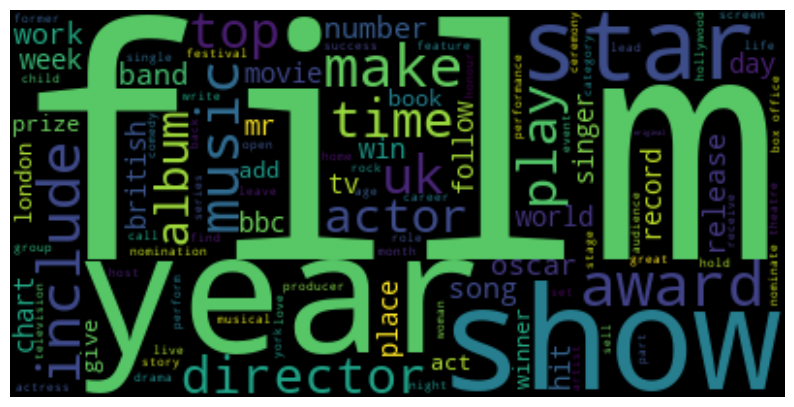

In [43]:
print("Word Cloud of Entertainment Category")
display_cloud(e_data['Clean'])

In [44]:
# validation : looking for unique characters in the cleaned text
e_unqiue = set()
for i in tqdm(e_data["Clean"]):
    e_unqiue.update(set(i))

print(e_unqiue)

100%|██████████| 273/273 [00:00<00:00, 88093.94it/s]

{'x', 'l', 'q', 'f', 'r', 'u', 'k', 'j', 'z', 'b', 't', 'c', 'o', 'g', 'w', 'y', 'm', ' ', 'h', 'i', 'e', 'p', 'a', 's', 'v', 'n', 'd'}


### 3. politics

In [45]:
p_data = train_df[train_df["Category"] == "politics"].copy()

p_data.shape

(274, 4)

In [46]:
p_data

,ArticleId,Text,Category,Clean_text
5,1582,howard truanted to play snooker conservative...,politics,howard truanted to play snooker conservative...
10,1683,blair rejects iraq advice calls tony blair has...,politics,blair rejects iraq advice calls tony blair has...
28,1527,uk will stand firm on eu rebate britain s £3b...,politics,uk will stand firm on eu rebate britain s £3b...
33,2100,security papers found in street an inquiry i...,politics,security papers found in street an inquiry i...
52,1763,mps quiz aides over royal income senior offici...,politics,mps quiz aides over royal income senior offici...
...,...,...,...,...
1456,955,blair told to double overseas aid tony blair i...,politics,blair told to double overseas aid tony blair i...
1463,2102,abbas will not tolerate attacks palestinian ...,politics,abbas will not tolerate attacks palestinian ...
1472,1806,kelly trails new discipline power teachers cou...,politics,kelly trails new discipline power teachers cou...
1475,980,budget to set scene for election gordon brown ...,politics,budget to set scene for election gordon brown ...


In [47]:
print("First 10 samples of politics relates news samples\n".format(), p_data[:10])

First 10 samples of politics relates news samples
     ArticleId                                               Text  Category  \
5        1582  howard  truanted to play snooker  conservative...  politics   
10       1683  blair rejects iraq advice calls tony blair has...  politics   
28       1527  uk will stand firm on eu rebate  britain s £3b...  politics   
33       2100  security papers  found in street  an inquiry i...  politics   
52       1763  mps quiz aides over royal income senior offici...  politics   
58       1518  tory backing for id cards the tories are to ba...  politics   
66       1079  stalemate in pension strike talks talks aimed ...  politics   
67        947  tories outlining policing plans local communit...  politics   
82        105  howard pitches for uk ethnic vote michael howa...  politics   
83       1297  clarke to press on with id cards new home secr...  politics   

                                           Clean_text  
5   howard  truanted to play snook

**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [48]:
# normalizing
p_data["Clean"] = p_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_centuries(x))

# remove numbers
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_numbers(x))

# remove special characters
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
p_data["Clean"] = p_data["Clean"].map(lambda x : remove_stopwords(x))

# lemmetization
p_data["Clean"] = p_data["Clean"].map(lambda x : lemma_corpus(x))

In [49]:
p_data.head()

,ArticleId,Text,Category,Clean_text,Clean
5,1582,howard truanted to play snooker conservative...,politics,howard truanted to play snooker conservative...,howard truanted play snooker conservative lead...
10,1683,blair rejects iraq advice calls tony blair has...,politics,blair rejects iraq advice calls tony blair has...,blair reject iraq advice call tony blair rejec...
28,1527,uk will stand firm on eu rebate britain s £3b...,politics,uk will stand firm on eu rebate britain s £3b...,uk stand firm eu rebate britain eu rebate rene...
33,2100,security papers found in street an inquiry i...,politics,security papers found in street an inquiry i...,security paper find street inquiry way file co...
52,1763,mps quiz aides over royal income senior offici...,politics,mps quiz aides over royal income senior offici...,mp quiz aide royal income senior official two ...


In [50]:
import random

for i in range(10):
    num = random.randint(0, p_data.shape[0])
    length = len(p_data.iloc[num][1])
    print(f"Text {num}: {p_data.iloc[num][1]}")
    print()
    print(f"Clean: {p_data.iloc[num][3]}")
    print('='*length)

Text 96: blunkett hints at election call ex-home secretary david blunkett has given fresh clues that the general election will be announced on monday.  he told bbc radio five live:  i m out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend.  he clarified that he meant he would be in his sheffield seat this weekend  not that he expected an election call then. tony blair is tipped to ask the queen on monday to dissolve parliament ready for a 5 may poll.

Clean: blunkett hints at election call ex-home secretary david blunkett has given fresh clues that the general election will be announced on monday.  he told bbc radio five live:  i m out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend.  he clarified that he meant he would be in his sheffield seat this weekend  not that he expected an election call then. tony blair is tipped to ask the queen on monday to dissolve parliament rea

Word Cloud of Politics Category


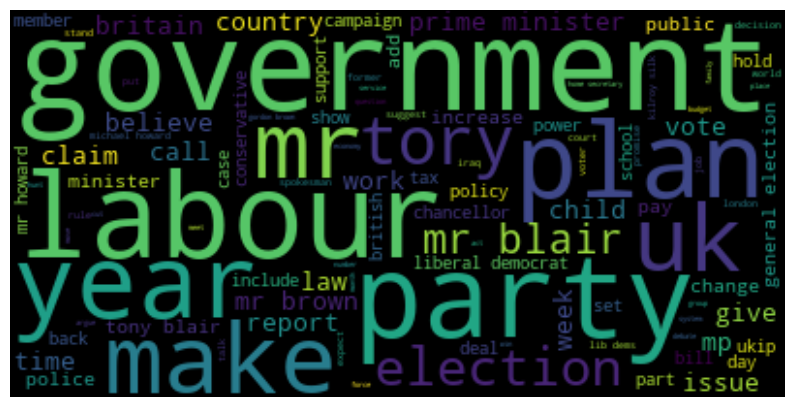

In [51]:
print("Word Cloud of Politics Category")
display_cloud(p_data['Clean'])

In [52]:
# validation : looking for unique characters in the cleaned text
p_unqiue = set()
for i in tqdm(p_data["Clean"]):
    p_unqiue.update(set(i))

print(p_unqiue)

100%|██████████| 274/274 [00:00<00:00, 65438.98it/s]

{'x', 'l', 'q', 'f', 'r', 'u', 'k', 'j', 'z', 'b', 't', 'o', 'c', 'g', 'n', 'w', 'y', 'm', ' ', 'h', 'i', 'p', 'a', 's', 'v', 'e', 'd'}


### 4. sport

In [53]:
s_data = train_df[train_df["Category"] == "sport"].copy()

s_data.shape

(346, 4)

In [54]:
print("First 10 samples of sport relates news samples\n".format(), s_data[:10])

First 10 samples of sport relates news samples
     ArticleId                                               Text Category  \
6         651  wales silent on grand slam talk rhys williams ...    sport   
14        707  ireland 21-19 argentina an injury-time dropped...    sport   
15       1588  wenger signs new deal arsenal manager arsene w...    sport   
17        486  hantuchova in dubai last eight daniela hantuch...    sport   
18       1344  melzer shocks agassi in san jose second seed a...    sport   
20       1547  hewitt overcomes wobble in sydney lleyton hewi...    sport   
22       1785  serena becomes world number two serena william...    sport   
23       1617  ferguson urges henry punishment sir alex fergu...    sport   
27       1026  henman to face saulnier test british number on...    sport   
34        466  philippoussis doubt over open bid mark philipp...    sport   

                                           Clean_text  
6   wales silent on grand slam talk rhys william

**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [55]:
# normalizing
s_data["Clean"] = s_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_centuries(x))

# remove numbers
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_numbers(x))

# remove special characters
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
s_data["Clean"] = s_data["Clean"].map(lambda x : remove_stopwords(x))

# lemmetization
s_data["Clean"] = s_data["Clean"].map(lambda x : lemma_corpus(x))

In [56]:
s_data.head()

,ArticleId,Text,Category,Clean_text,Clean
6,651,wales silent on grand slam talk rhys williams ...,sport,wales silent on grand slam talk rhys williams ...,wale silent grand slam talk rhys williams say ...
14,707,ireland 21-19 argentina an injury-time dropped...,sport,ireland 21-19 argentina an injury-time dropped...,ireland argentina injury time drop goal ronan ...
15,1588,wenger signs new deal arsenal manager arsene w...,sport,wenger signs new deal arsenal manager arsene w...,wenger sign new deal arsenal manager arsene we...
17,486,hantuchova in dubai last eight daniela hantuch...,sport,hantuchova in dubai last eight daniela hantuch...,hantuchova dubai last eight daniela hantuchova...
18,1344,melzer shocks agassi in san jose second seed a...,sport,melzer shocks agassi in san jose second seed a...,melzer shock agassi san jose second seed andre...


In [57]:
import random

for i in range(10):
    num = random.randint(0, s_data.shape[0])
    length = len(s_data.iloc[num][1])
    print(f"Text {num}: {s_data.iloc[num][1]}")
    print()
    print(f"Clean: {s_data.iloc[num][3]}")
    print('='*length)

Text 157: nadal marches on in mexico rafael nadal continued his run of fine form to beat guillermo canas and reach the mexican open semis in acapulco.  eighth seed nadal  who picked up his second atp title when he beat alberto martin in last week s brazil open  saw off the argentine third seed 7-5 6-3. he now meets argentine wild card mariano puerta  who followed up his win over top seed carlos moya by overcoming spain s felix mantilla  6-4 3-6 7-6. czech fifth seed czech jiri novak was eliminated 7-5 6-1 by agustin calleri. the unseeded argentine  who won the tournament two years ago  now plays spain s albert montanes. montanes advanced to his first semi-final of the year with a 4-6 6-3 6-4 triumph over sixth-seeded italian filippo volandri. argentina s agustin calleri beat fourth seed jiri novak 7-5 6-1 in a battle of former champions at the mexican open. calleri won his only atp title in acapulco two years ago while novak won the singles and doubles titles in 1998. calleri will face

Word Cloud of Sport Category


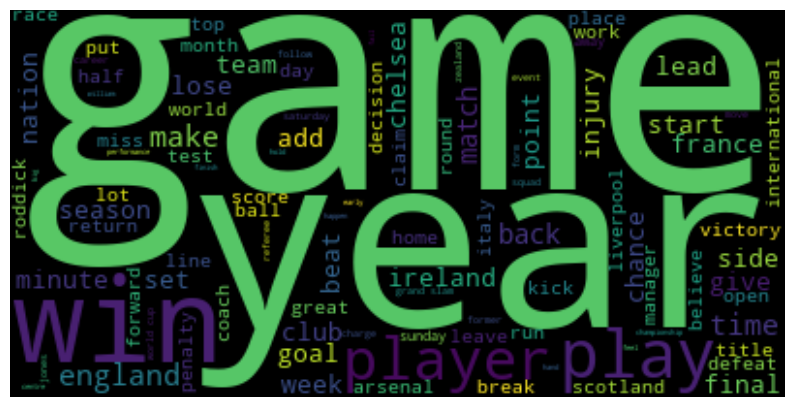

In [58]:
print("Word Cloud of Sport Category")
display_cloud(s_data['Clean'])

In [59]:
# validation : looking for unique characters in the cleaned text
s_unqiue = set()
for i in tqdm(s_data["Clean"]):
    s_unqiue.update(set(i))

print(s_unqiue)

100%|██████████| 346/346 [00:00<00:00, 96806.70it/s]

{'x', 'l', 'q', 'f', 'r', 'u', 'k', 'j', 'z', 'b', 't', 'c', 'o', 'g', 'w', 'y', 'm', ' ', 'h', 'i', 'e', 'p', 'a', 's', 'v', 'n', 'd'}


### 5. tech

In [60]:
t_data = train_df[train_df["Category"] == "tech"].copy()

t_data.shape

(261, 4)

In [61]:
print("First 10 samples of tech relates news samples\n".format(), t_data[:10])

First 10 samples of tech relates news samples
     ArticleId                                               Text Category  \
3        1976  lifestyle  governs mobile choice  faster  bett...     tech   
19       1552  moving mobile improves golf swing a mobile pho...     tech   
24        405  bt boosts its broadband packages british telec...     tech   
26        702  peer-to-peer nets  here to stay  peer-to-peer ...     tech   
30       1951  pompeii gets digital make-over the old-fashion...     tech   
39       1532  security scares spark browser fix microsoft is...     tech   
40       2205  argonaut founder rebuilds empire jez san  the ...     tech   
43       1394  viewers to be able to shape tv imagine editing...     tech   
46        593  china  ripe  for media explosion asia is set t...     tech   
47        590  broadband fuels online change fast web access ...     tech   

                                           Clean_text  
3   lifestyle  governs mobile choice  faster  bet

**Data Containes:**

- Currancies
- Years
- Percentage
- Numbers 

In [62]:
# normalizing
t_data["Clean"] = t_data["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_centuries(x))

# remove numbers
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_numbers(x))

# remove special characters
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_special_characters(x))

# remove punctuations
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
t_data["Clean"] = t_data["Clean"].map(lambda x : remove_stopwords(x))

# lemmetization
t_data["Clean"] = t_data["Clean"].map(lambda x : lemma_corpus(x))

In [63]:
t_data.head()

,ArticleId,Text,Category,Clean_text,Clean
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...,lifestyle governs mobile choice faster well fu...
19,1552,moving mobile improves golf swing a mobile pho...,tech,moving mobile improves golf swing a mobile pho...,move mobile improves golf swing mobile phone r...
24,405,bt boosts its broadband packages british telec...,tech,bt boosts its broadband packages british telec...,bt boost broadband package british telecom say...
26,702,peer-to-peer nets here to stay peer-to-peer ...,tech,peer-to-peer nets here to stay peer-to-peer ...,peer peer net stay peer peer pp network stay v...
30,1951,pompeii gets digital make-over the old-fashion...,tech,pompeii gets digital make-over the old-fashion...,pompeii get digital make old fashion audio tou...


In [64]:
import random

for i in range(10):
    num = random.randint(0, t_data.shape[0])
    length = len(t_data.iloc[num][1])
    print(f"Text {num}: {t_data.iloc[num][1]}")
    print()
    print(f"Clean: {t_data.iloc[num][3]}")
    print('='*length)

Text 33: bt program to beat dialler scams bt is introducing two initiatives to help beat rogue dialler scams  which can cost dial-up net users thousands.  from may  dial-up net users will be able to download free software to stop computers using numbers not on a user s  pre-approved list . inadvertently downloaded by surfers  rogue diallers are programs which hijack modems and dial up a premium rate number when users log on. thousands of uk dial-up users are believed to have been hit by the scam. some people have faced phone bills of up to £2 000. bt s modem protection program will check numbers that are dialled by a computer and will block them if they have not been pre-approved  such as national and net service provider numbers. icstis  the uk s premium rate services watchdog  said it had been looking for companies to take the lead in initiatives.  the initiatives are very welcome   a spokesperson from icstis told the bbc news website.  we are very pleased to see they are putting int

Word Cloud of Tech Category


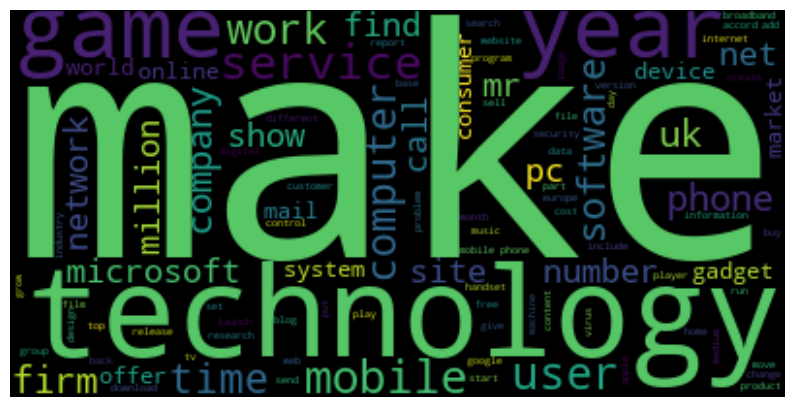

In [65]:
print("Word Cloud of Tech Category")
display_cloud(t_data['Clean'])

## Full Text Cleaning

In [66]:
train_df.head()

,ArticleId,Text,Category,Clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex-boss launches defence lawyers defe...
1,154,german business confidence slides german busin...,business,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicates economic gloom citizens in ...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster bett...
4,917,enron bosses in $168m payout eighteen former e...,business,enron bosses in $168m payout eighteen former e...


In [67]:
# normalizing
train_df["Clean_text"] = train_df["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_centuries(x))

# remove numbers
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_numbers(x))

# remove special characters
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_special_characters(x))

# remove punctuations
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords 
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : remove_stopwords(x))

# lemmatize: nouns, verbs, adjectives, adverbs, satellite adjectives
train_df["Clean_text"] = train_df["Clean_text"].map(lambda x : lemma_corpus(x))

In [68]:
train_df.head()

,ArticleId,Text,Category,Clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


In [69]:
import random

for i in range(10):
    num = random.randint(0, train_df.shape[0])
    length = len(train_df.iloc[num][1])
    print(f"Text {num}: {train_df.iloc[num][1]}")
    print()
    print(f"Clean: {train_df.iloc[num][3]}")
    print('='*length)

Text 94: best person  for top legal job the  best person for the job  should be appointed lord chancellor  and not necessarily a lawyer or mp  the courts minister has told mps.  under reforms  the post of lord chancellor is to be stripped of its judicial functions.  the lord chancellor...no more needs to be a lawyer than the secretary of health needs to be a doctor   said courts minister christopher leslie. the constitutional reform bill was entering its second reading on monday. mr leslie said:  the prime minister should be able to appoint the best person for the job whether they sit in the house of lords or the house of commons.  under the reforms  the law lords will also be replaced as the uk s highest legal authority by a supreme court and judges will be appointed by an independent panel rather than ministers.  in december the lords rejected a plea by current lord chancellor lord falconer that the holder of the job should not necessarily be a lawyer or a peer. the peers voted by 22

In [70]:
train_df.head()

,ArticleId,Text,Category,Clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


Word Cloud of All Category


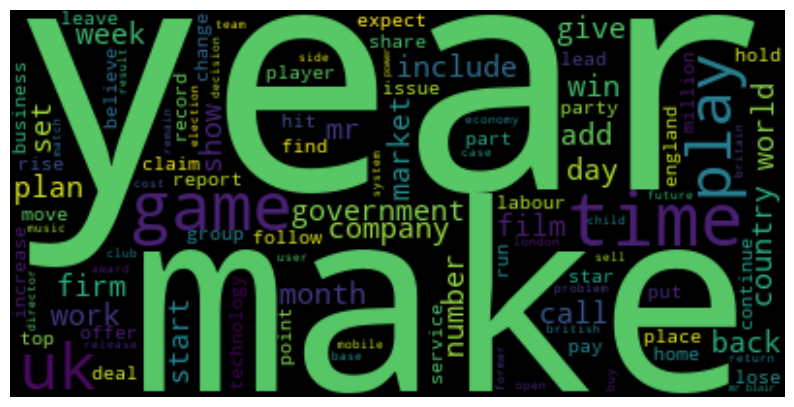

In [71]:
print("Word Cloud of All Category")
display_cloud(train_df['Clean_text'])

## Label Encoding

In [72]:
train_df.head()

,ArticleId,Text,Category,Clean_text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...


In [73]:
category_label = {}
for index, category in enumerate(train_df["Category"].unique()):
    print(index, ':', category)
    category_label.update({category : index})

train_df["Label"] = train_df["Category"].map(lambda x : category_label[x])

0 : business
1 : tech
2 : politics
3 : sport
4 : entertainment


In [74]:
train_df.head()

,ArticleId,Text,Category,Clean_text,Label
0,1833,worldcom ex-boss launches defence lawyers defe...,business,worldcom ex bos launch defence lawyer defend f...,0
1,154,german business confidence slides german busin...,business,german business confidence slide german busine...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,bbc poll indicate economic gloom citizen major...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,lifestyle governs mobile choice faster well fu...,1
4,917,enron bosses in $168m payout eighteen former e...,business,enron boss payout eighteen former enron direct...,0


## Cleaning Test Data

In [75]:
# normalizing
test_df["Clean_text"] = test_df["Text"].map(lambda x : x.lower())

# remove curruncies : businesss, entertainment
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_curruncies(x))

# remove percentage : businesss
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_percentage(x))

# remove distance : entertainment
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_distances(x))

# remove conturies : entertainment
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_centuries(x))

# remove numbers
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_numbers(x))

# remove special characters
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_special_characters(x))

# remove punctuations
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_punctuation(x))

# remove multilpe spaces
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_multiple_spaces(x))

# remove stopwords
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : remove_stopwords(x))

# lemmatize: nouns, verbs, adjectives, adverbs, satellite adjectives
test_df["Clean_text"] = test_df["Clean_text"].map(lambda x : lemma_corpus(x))

In [76]:
test_df.head()

,ArticleId,Text,Clean_text
0,1018,qpr keeper day heads for preston queens park r...,qpr keeper day head preston queen park ranger ...
1,1319,software watching while you work software that...,software watch work software monitor every key...
2,1138,d arcy injury adds to ireland woe gordon d arc...,arcy injury add ireland woe gordon arcy rule i...
3,459,india s reliance family feud heats up the ongo...,india reliance family feud heat ongoing public...
4,1020,boro suffer morrison injury blow middlesbrough...,boro suffer morrison injury blow middlesbrough...


In [77]:
train_df.to_csv(os.path.join(DATA_PATH, "train_data_cleaned.csv"),index=False)
test_df.to_csv(os.path.join(DATA_PATH, "test_data_cleaned.csv"),index=False)

## Data Transformation

In [78]:
import os

In [79]:
%pwd

'/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/bbc-news-sorting/notebooks'

In [80]:
os.chdir("../")

In [81]:
%pwd

'/Users/rahulshelke/Documents/Data-Science/Data-Science-Projects/bbc-news-sorting'

In [82]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataCleaningConfig:
    root_dir: Path
    raw_data_file: str
    clean_data_file: Path
    target_encoder_obj: Path

In [83]:
from src.news_sorting_project.constants import *
from src.news_sorting_project.utils.common import save_object, save_csv, create_directories, read_yaml
from sklearn.preprocessing import LabelEncoder
import numpy as np
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [84]:
class CofigurationManager:
    def __init__(
            self,
            config_filepath = CONFIG_FILE_PATH,
            params_filepath = PARAMS_FILE_PATH,
    ):
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)

        create_directories([self.config.artifacts_root])

    def get_data_cleaning_config(self) -> DataCleaningConfig:
        config = self.config.data_cleaning

        create_directories([config.root_dir])

        data_clearning_config = DataCleaningConfig(
            root_dir=config.root_dir,
            raw_data_file=config.raw_data_file,
            clean_data_file = config.clean_data_file,
            target_encoder_obj = config.target_encoder_obj
        )

        return data_clearning_config

Process:

1. load train data
2. clean data with string functions
3. encode the tagets
4. save whole data it

In [85]:
from src.news_sorting_project import logger
from tqdm import tqdm
import pandas as pd
import re

In [86]:
    # Define a dictionary of common contractions and their expanded forms
contractions_dict = {
    "isn't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "i'd": "I would",
    "i'll": "I will",
    "i'm": "I am",
    "i've": "I have",
    "i'd've": "I would have",
    "i'm": "I am",
    "let's": "let us",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "weren't": "were not",
    "what's": "what is",
    "who's": "who is",
    "who've": "who have",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

### Functions

In [87]:
class DataCleaning:
    def __init__(self, config: DataCleaningConfig):
        self.data_cleaning_config = config
        self.stop_words = set(stopwords.words('english'))
   
    # Function to expand contractions in a text
    @staticmethod
    def expand_contractions(text):
        # Use regular expression to find contractions and replace them
        pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')
        expanded_text = pattern.sub(lambda x: contractions_dict[x.group()], text)
        return expanded_text
    
    @staticmethod
    def remove_curruncies(text):
        """
        removes different curruancies from text
        e.g., $1,000, ₹500, €10.99

        Args: text (str)

        Returns: text (str)
        """
        try:
            # Currency regex pattern (includes symbols and codes)
            currency_pattern = r'[\₹\$\€\¥\£\₣\₽]?\d{1,3}(?:,\d{3})*(?:\.\d+)?(?:[mbn]{1,2})?|\b(?:USD|EUR|INR|GBP|JPY|CAD|AUD|CNY)\b|[\₹\$\€\¥\£\₣\₽]'


            currency_free_text = re.sub(currency_pattern, '', text)

            return currency_free_text
        except Exception as e:
            raise e

    @staticmethod
    def remove_percentage(text):
        """ 
        removes percentages
        ex.,  25%, 5.5%, 1,000%
        """
        try:
            # Regex pattern to remove percentages
            percentage_pattern = r'\d{1,3}(?:,\d{3})*(?:\.\d+)?%'

            # Remove all percentage values
            cleaned_text = re.sub(percentage_pattern, '', text)

            return cleaned_text
        except Exception as e:
            raise e
        
    @staticmethod
    def remove_numbers(text):
        """ 
        removes numbers from text
        ex., 
        - Integers (e.g., 100, 20)
        - Decimals (e.g., 5.5, 1000.99)
        - Numbers with commas (e.g., 1,000, 1,000,000)
        """
        try:
            # Regex pattern to remove numbers
            number_pattern = r'\b\d+(?:,\d{3})*(?:\.\d+)?\b'

            # Remove all numbers
            cleaned_text = re.sub(number_pattern, '', text)

            return cleaned_text
        except Exception as e:
            raise e
    
    @staticmethod
    def remove_punctuation(text):
        """
        Removes all punctuation from the text.
        
        Args:
        text (str): Input string containing text with punctuation.
        
        Returns:
        str: Text with punctuation removed.
        """
        try:
            # Regex pattern to match any punctuation character
            punctuation_pattern = r'[' + re.escape(string.punctuation) + r']'
            
            # Replace all punctuation marks with an empty string
            cleaned_text = re.sub(punctuation_pattern, '', text)
            
            return cleaned_text
        except Exception as e:
            raise e
        
    @staticmethod
    def remove_special_characters(text):
        """
        Removes special characters (non-alphanumeric characters) from the text.
        
        Args:
        text (str): Input string containing special characters.
        
        Returns:
        str: Text with special characters removed.
        """
        try:
            # Regex pattern to match any character that is not a letter or a digit
            special_characters_pattern = r'[^a-zA-Z0-9\s]'  # Allow only letters, digits, and spaces
            
            # Replace all special characters with an empty string
            cleaned_text = re.sub(special_characters_pattern, ' ', text)
            
            return cleaned_text
        except Exception as e:
            raise e
        
    @staticmethod
    def remove_multiple_spaces(text):
        """
        removes multiple spaces
        """
        try:
            cleaned_text = re.sub(r'\s+', ' ', text)
            return cleaned_text
        except Exception as e:
            raise e
             
    # Define a function to process each text entry
    @staticmethod
    def remove_stopwords(text: str, stop_words: list):
        # Convert text to lowercase and split into words
        words = text.lower().split()
        
        # Remove stop words and punctuation
        words = [word.strip(string.punctuation) for word in words if word not in stop_words]
        
        # Return the cleaned text
        return ' '.join(words)
    
    @staticmethod
    def remove_distances(text):
        """
        Removes distances from the text (e.g., 30ft, 10m, 5km, etc.).
        
        Args:
        text (str): Input string containing distances.
        
        Returns:
        str: Text with distances removed.
        """
        try:
            # Regex pattern to match distances (integers or decimals followed by distance units)
            distance_pattern = r'\d+(?:\.\d+)?\s*(ft|m|km|cm|mm|yd|mi)\b'
            
            # Replace all occurrences of the distance pattern with an empty string
            cleaned_text = re.sub(distance_pattern, '', text)
            
            return cleaned_text
        except Exception as e:
            raise e
        
    @staticmethod
    def remove_centuries(text):
        """
        Removes centuries (e.g., 18th, 21st) from the text.
        
        Args:
        text (str): Input string containing centuries.
        
        Returns:
        str: Text with centuries removed.
        """
        try:
            # Regex pattern to match centuries (e.g., 18th, 21st, 5th, 20th)
            century_pattern = r'\d{1,2}(st|nd|rd|th)\b'
            
            # Replace all occurrences of centuries with an empty string
            cleaned_text = re.sub(century_pattern, '', text)
            
            return cleaned_text
        except Exception as e:
            raise e
    
    @staticmethod
    # Function to map POS tag to WordNet POS tag
    def get_wordnet_pos(tag):
        if tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN  # default to NOUN
        
    @staticmethod
    #Lemmatize the dataset`
    def lemma_corpus(data):
        lemmatizer=WordNetLemmatizer()

        # Tokenize and get POS tags
        tokens = word_tokenize(data)
        pos_tags = nltk.pos_tag(tokens)

        # Lemmatize with correct POS tags
        lemmatized_words = [
            lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags
        ]

        return " ".join(lemmatized_words)
    
    def data_preprocessing(self, text: str):
        try:
            # normalizing
            text = text.lower()

            # remove curruncies : businesss, entertainment
            text = self.remove_curruncies(text)

            # remove percentage : businesss
            text = self.remove_percentage(text)

            # remove distance : entertainment
            text = self.remove_distances(text)

            # remove conturies : entertainment
            text = self.remove_centuries(text)

            # remove numbers
            text = self.remove_numbers(text)

            # remove special characters
            text = self.remove_special_characters(text)

            # remove punctuations
            text = self.remove_punctuation(text)

            # remove multilpe spaces
            text = self.remove_multiple_spaces(text)

            # remove stopwords
            text = self.remove_stopwords(text, self.stop_words)

            # lemmatize
            text = self.lemma_corpus(text)

            return text
        except Exception as e:
            raise e


    def get_data_transformer_object(self):
        return LabelEncoder()
        
    def initiate_data_cleaning(self):   
        try:
            # loading data
            train_df = pd.read_csv(self.data_cleaning_config.raw_data_file)

            logger.info("Reading raw data file successfully!")

            # loading target encoder
            preprocessing_obj=self.get_data_transformer_object()

            # names of columns to consider
            target_column_name="Category"
            text_column_name = "Text"

            logger.info("Data Cleaning Started!")
            
            # process bar for each text processing
            clean_text = []
            for text in tqdm(train_df[text_column_name], desc="Cleaning Text"):
                clean_text.append(self.data_preprocessing(text))

            logger.info("Data Cleaned Successfully!")
            
            ## target encoding
            logger.info("Data Encoding Started!")

            encoded_target =preprocessing_obj.fit_transform(train_df[target_column_name])

            logger.info("Data Encoding Successfully!")


            clean_df = pd.DataFrame({
                "text": clean_text,
                "label": encoded_target
            })

            save_csv(clean_df, self.data_cleaning_config.clean_data_file)
            
            logger.info(f"Saved cleand data")


            save_object(
                obj= preprocessing_obj,
                file_path=self.data_cleaning_config.target_encoder_obj
            )
            logger.info(f"Saved preprocessing object")

        except Exception as e:
            raise e

In [88]:
try:
    config = CofigurationManager()
    data_cleaning_config = config.get_data_cleaning_config()
    data_cleaning = DataCleaning(config=data_cleaning_config)
    data_cleaning.initiate_data_cleaning()
except Exception as e:
    raise e

Cleaning Text: 100%|██████████| 1490/1490 [00:07<00:00, 189.78it/s]


### Single Data Cleaner

In [89]:
text = """worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a 
battery of fraud charges have called a company whistleblower as their first witness.  
cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at
 the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn 
 (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  
 prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  
 ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. 
 but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that 
 external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. 
 she said andersen had given a  green light  to the procedures and practices used by worldcom. 
 mr ebber s lawyers have said he was unaware of the fraud  arguing that auditors did not alert him to any problems.  
 ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s 
 finance chief  giving only  brief  answers himself. the prosecution s star witness  former worldcom financial chief 
 scott sullivan  has said that mr ebbers ordered accounting adjustments at the firm  telling him to  hit our books . 
 however  ms cooper said mr sullivan had not mentioned  anything uncomfortable  about worldcom s accounting during a 
 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is 
 facing. worldcom emerged from bankruptcy protection in 2004  and is now known as mci. 
 last week  mci agreed to a buyout by verizon communications in a deal valued at $6.75bn."""


In [90]:
try:
    config = CofigurationManager()
    data_cleaning_config = config.get_data_cleaning_config()
    data_cleaning = DataCleaning(config=data_cleaning_config)
    print(f"Clean Text : {data_cleaning.data_preprocessing(text)}")
except Exception as e:
    raise e

Clean Text : worldcom ex bos launch defence lawyer defend former worldcom chief bernie ebbers battery fraud charge call company whistleblower first witness cynthia cooper worldcom ex head internal accounting alert director irregular accounting practice u telecoms giant warning lead collapse firm follow discovery accounting fraud mr ebbers plead guilty charge fraud conspiracy prosecution lawyer argue mr ebbers orchestrate series accounting trick worldcom order employee hide expense inflate revenue meet wall street earnings estimate ms cooper run consult business tell jury new york wednesday external auditor arthur andersen approve worldcom account early say andersen give green light procedure practice use worldcom mr ebber lawyer say unaware fraud argue auditor alert problem ms cooper also say shareholder meeting mr ebbers often pass technical question company finance chief give brief answer prosecution star witness former worldcom financial chief scott sullivan say mr ebbers order acco